이 글 읽으면 Hadoop ecosystem 이해 가능,


# 1. Hadoop : 높은 확장성과 신뢰성 보유한 분산 storage
## 1-1. 하둡의 기본 구성 요소
- 분산 파일 시스템
    - HDFS(Hadoop DIstributed File System)
- 리소스 관리자
    - YARN(Yet Another Resource Negotiation)
- 분산 데이터 처리
    - MapReduce

를 제공하는 오픈 소스임.

## 1-2. Hadoop의 역사

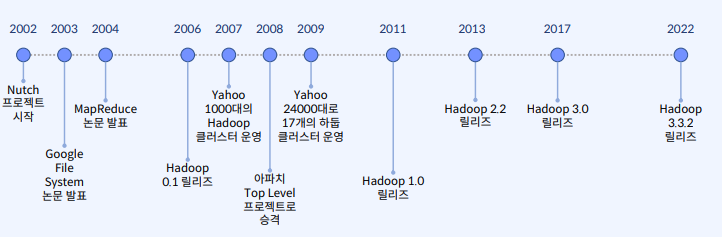

- 2006년에 하둡0.1 버전 배포

## 1-3. Hadoop ecosystem

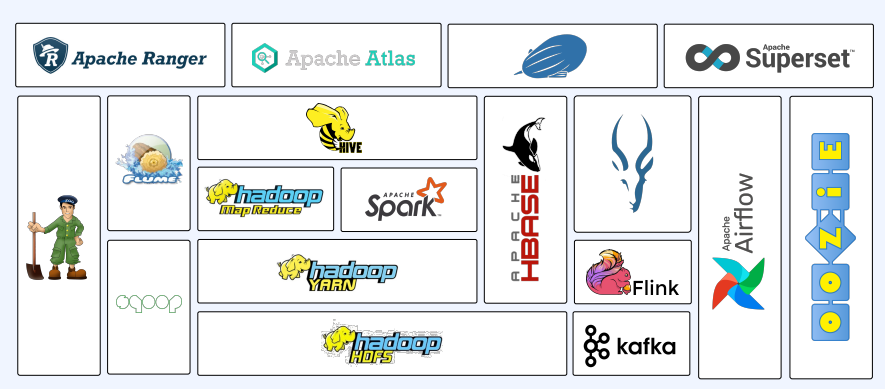

- 수집을 위한 프로젝트
    - apache flume, ninefine
    - 이벤트 관련 수집 kafca
- 데이터처리
    - MapReduce: 분산 데이터 처리 담당 
    - apache spark: 데이터 처리 엔진, 배치부터 스트리밍, 그래프 처리 머신러닝 까지 통합된 엔진 제공
    - sql Hive: sql을 통해 배치처리 가능
    - apache impala: 대화형 쿼리형 엔진. 쿼리를 빠르게 받아볼 수 있음
    - Flick: 스트리밍처리뿐만아니라 배치처리 함께 제공
    - kafka : 스트리밍 처리를 위한 기능 제공
- 데이터 저장
    - HDFS
    - HBASE: 실시간으로 랜덤 엑세스 가능. 업데이트 가능
- zookeeper[주키퍼]
    - 하둡의 에코시스템 프로젝트 이름들이 동물이름으로 되어있음. 이를 조절해주는 기능을 제공해줌
- workflow 관리도구
    - apache oozie[우지]
    - apache Airflow: 최근에 많이 사용
    - apache Ranger: 하둡에코시스템에 보안시스템 제공. rest api사용해서.
    - apache Atlas: 메타데이터를 관리하는 프로젝트. 테이블 컬럼을 해시태그를 통해 검색. 테이블에 특정 컬럼에 권한을 부여해서 접근권한이나 마스킹 제공.
    - apache Zeppelin[제플린]: 웹기반의 노트북. 주피터 노트북같은거. 분석 결과를 그래프나 테이블과 같은 형태로 보여주는 기능이 있음. spark, hive 기타 jdbc와 연결해서 사용.
    - apache Superset: 웹기반의 데이터 시각화 BI툴. 에어비앤비에서 오픈소스화한 툴.


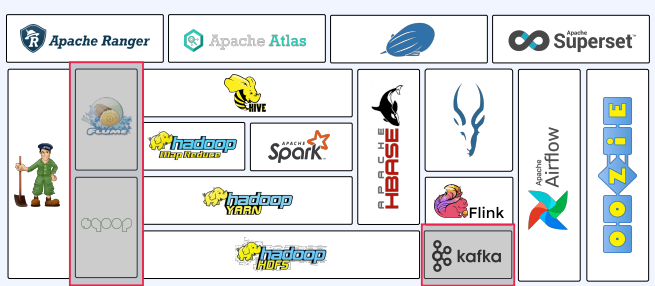

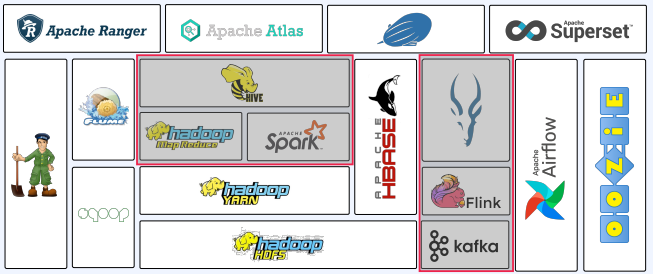